# Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Create Unlebeled data

In [19]:
np.random.seed(42)

data = {
    "Age": np.random.randint(18, 65, 200),
    "Annual_Income": np.random.randint(20000, 120000, 200),
    "Spending_Score": np.random.randint(1, 100, 200)
}

df = pd.DataFrame(data)
df.head()

,Age,Annual_Income,Spending_Score
0,56,72733,36
1,46,85318,45
2,32,109474,20
3,60,43664,65
4,25,87172,8


# Feature Scaling

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# K-mean with Arbitrary k

In [21]:
kmeans_random = KMeans(n_clusters=4, random_state=42)
labels_random = kmeans_random.fit_predict(scaled_data)

# Silhouette Score (No Optimization)

In [22]:
score_random = silhouette_score(scaled_data, labels_random)
score_random

np.float64(0.26367518697570547)

# Elbow Method

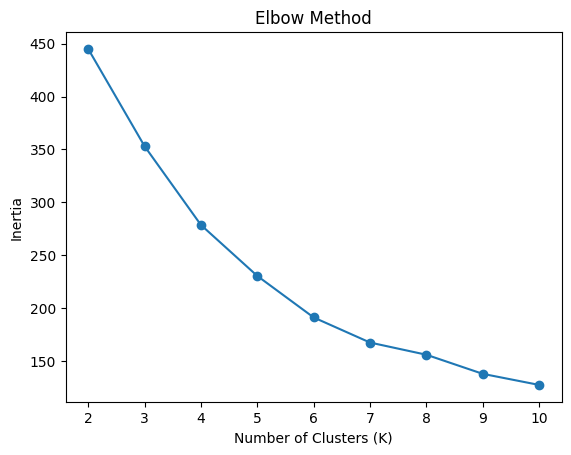

In [23]:
inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Silhouette Score for Different K

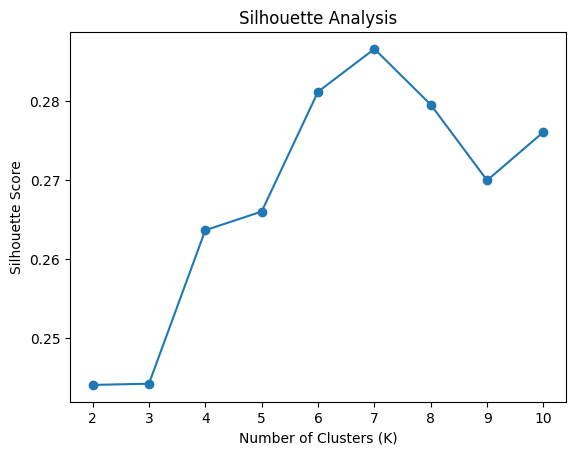

In [24]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

# Final Optimized Model

In [25]:
kmeans_opt = KMeans(n_clusters=3, random_state=42)
labels_opt = kmeans_opt.fit_predict(scaled_data)

score_opt = silhouette_score(scaled_data, labels_opt)
score_opt

np.float64(0.2442687852746136)

Clustering Approach: K-Means Clustering
Optimization Method: Elbow Method & Silhouette Score
Final K: 3

Feature scaling was applied to ensure equal contribution of all variables.
The optimized clustering approach produced higher silhouette scores and more interpretable customer groups compared to arbitrary K selection.
These clusters represent meaningful segments based on age, income, and spending behavior, making them suitable for business decision-making.